# Feature Correspondence Notebook

This Notebook's goal is to do feature detection and correspondence in images, using OpenCV.

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# My utility functions
from utils import *

# For timing tests
import time

import itertools

Loading image Checkerboard/IMG_0821.jpg


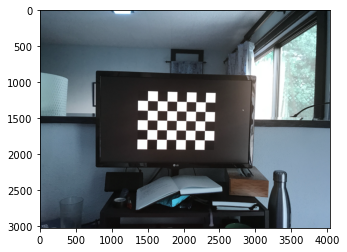

In [3]:
img_name = "Checkerboard/IMG_0821.jpg"
print(f"Loading image {img_name}")
image = load_image(img_name)
plt.imshow(image)
plt.show()

In [4]:
files = glob_data("Checkerboard/*.jpg")

0.008546328


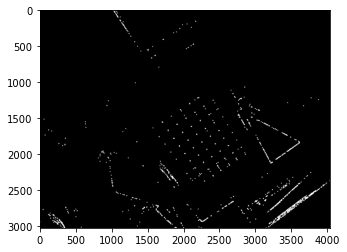

0.0311012


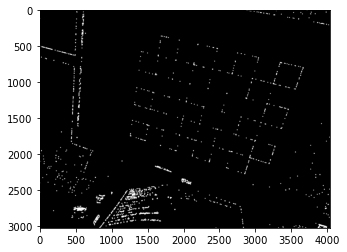

0.038993392


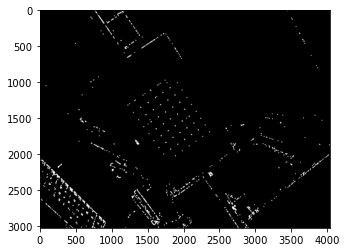

In [42]:
# Harris Corner Detector features - not great, but a first kind of feature to investigate
for f in files[0:3]:
    img = convert_image_c2f(load_image(f, grayscale=True))
    dst = cv2.cornerHarris(img, 2, 3, 0.04)
    print(dst.max())
    dst[dst > 0.005 * dst.max()] = 1.0
    dst = cv2.dilate(dst, None, iterations=5)
    plt.imshow(dst, cmap='gray')
    plt.show()

In [65]:
def print_keypoints(points):
    if not isinstance(points, list):
        points = [points]
    for point in points:
        print(f"Point: {point.pt}")
        print(f"Angle: {point.angle}")
        print(f"Size: {point.size}")
        print(f"Response: {point.response}")

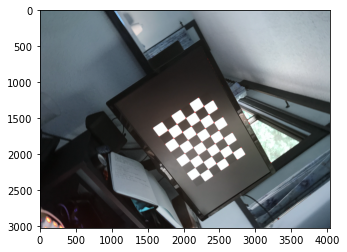

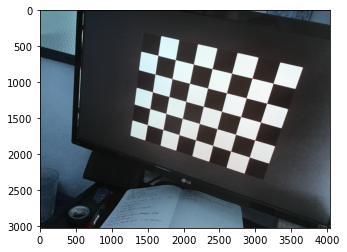

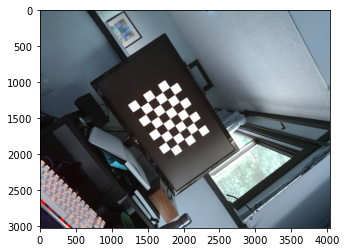

In [67]:
# ORB features
for f in files[0:3]:
    img = load_image(f)
    orb = cv2.ORB_create()
    # find the keypoints with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    #print_keypoints(kp)
    # draw only keypoints location,not size and orientation
    img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0), flags=0)
    plt.imshow(img2)
    plt.show()

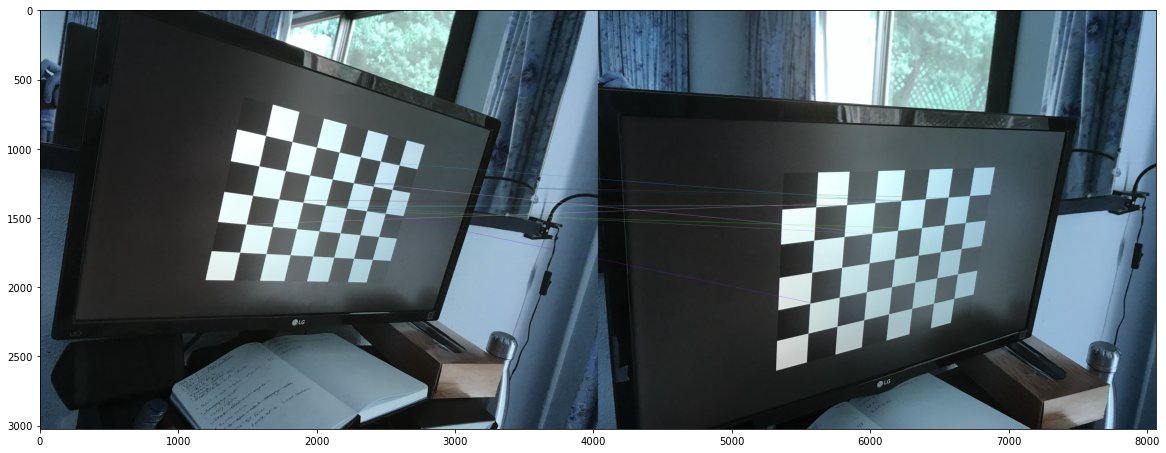

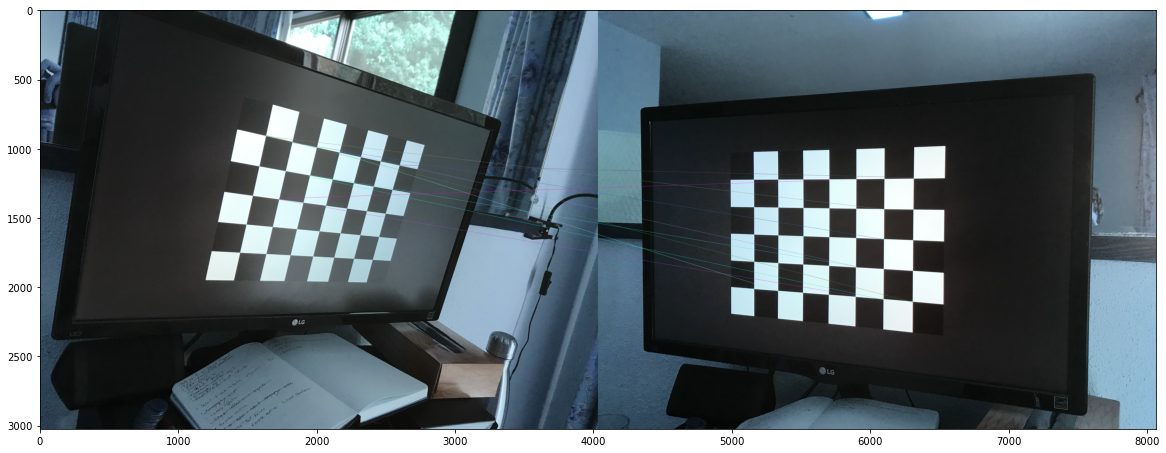

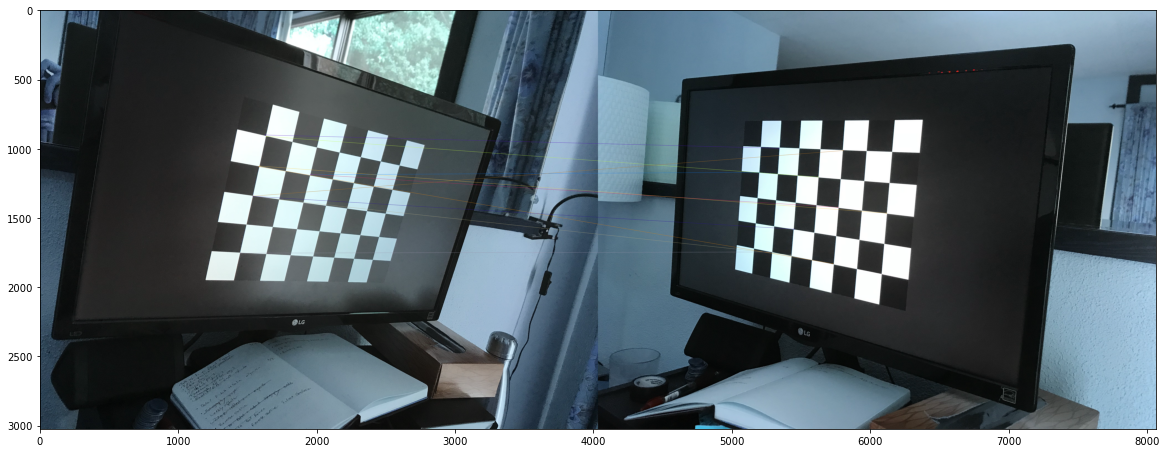

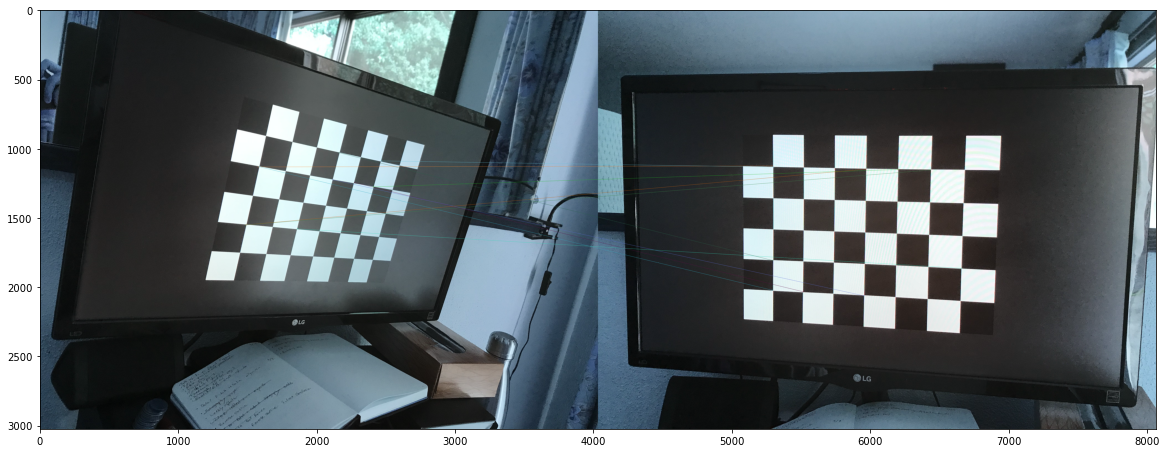

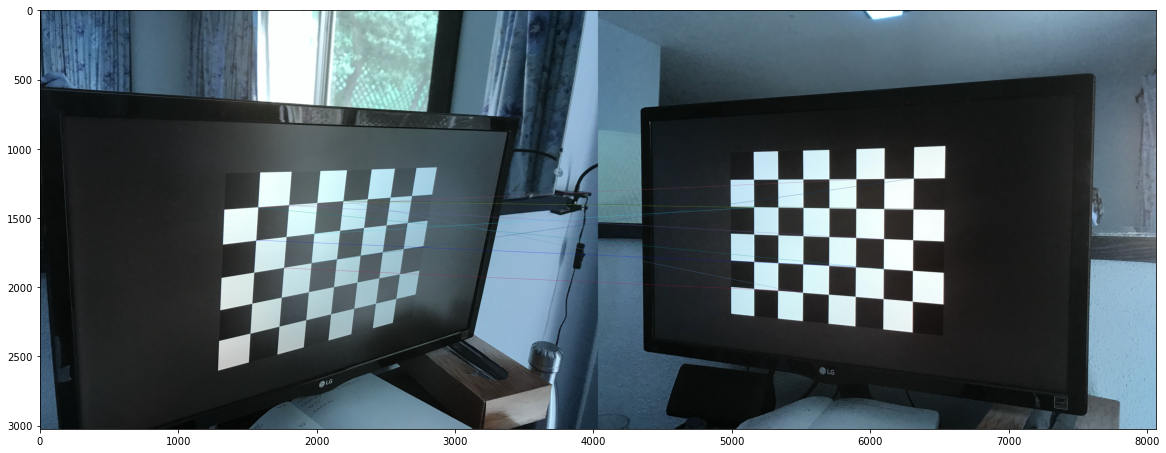

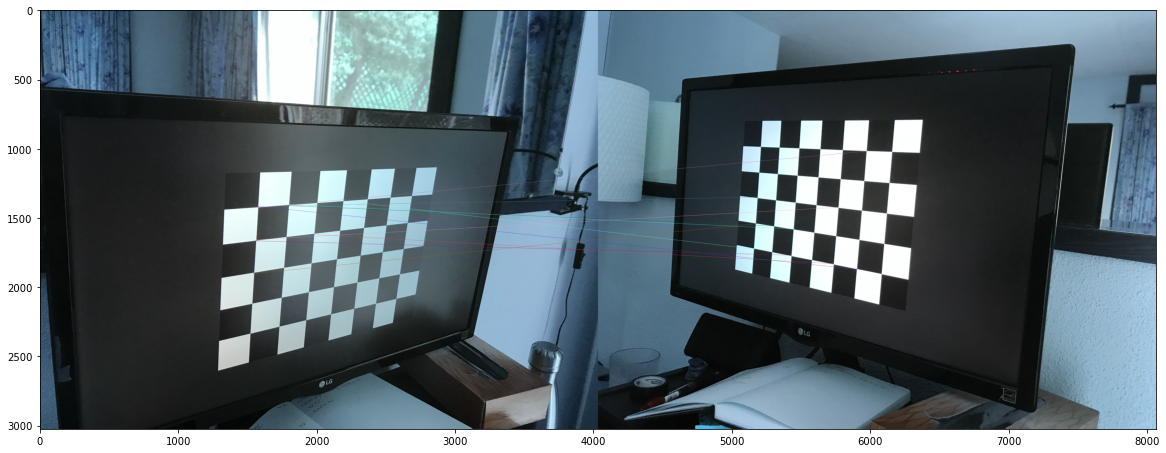

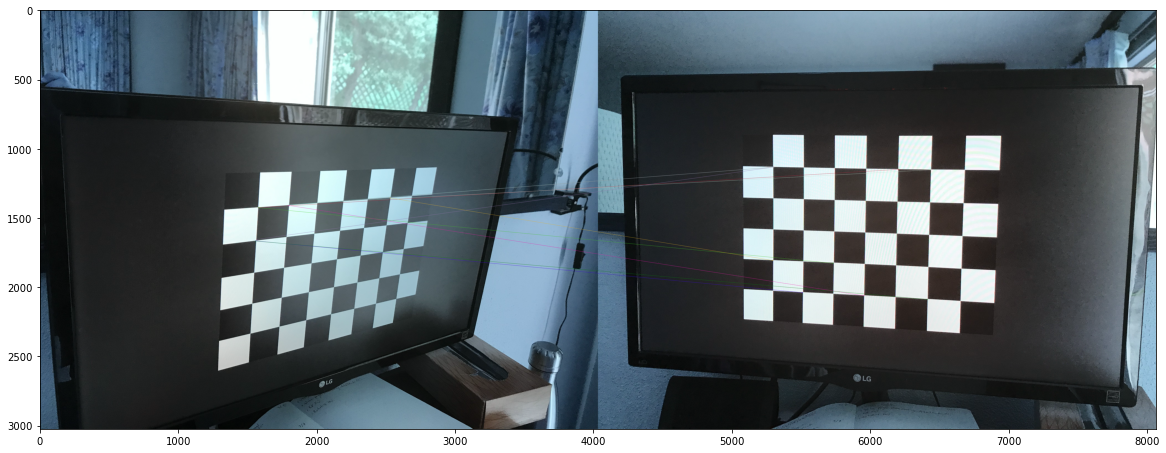

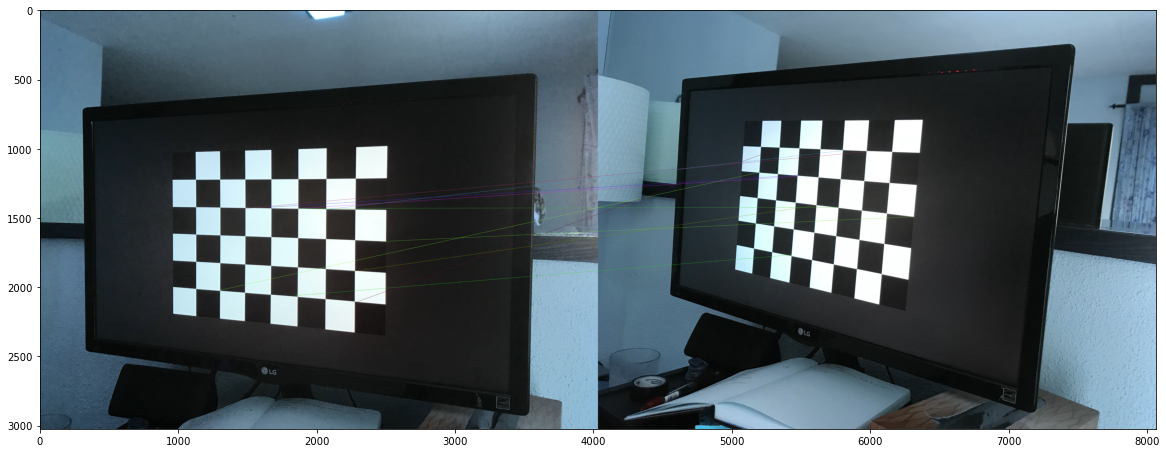

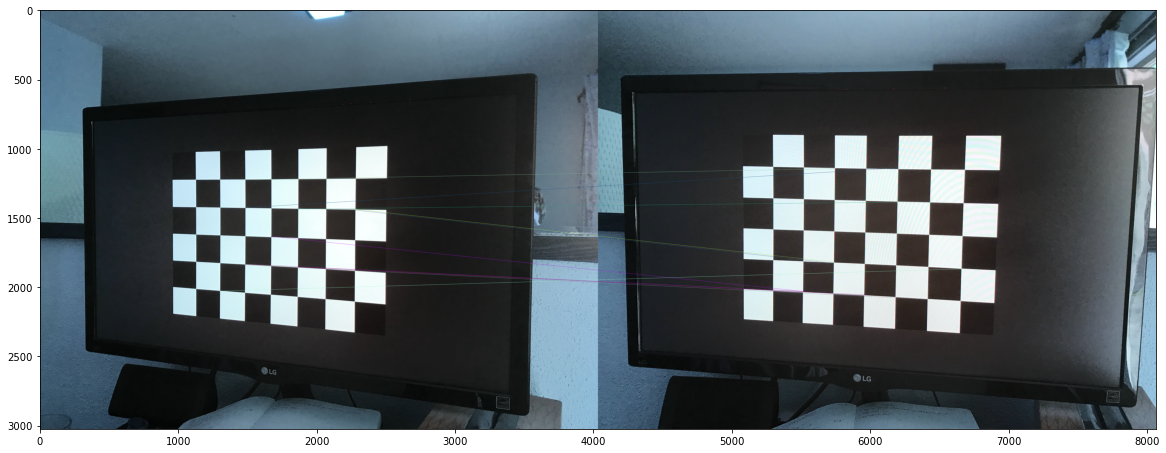

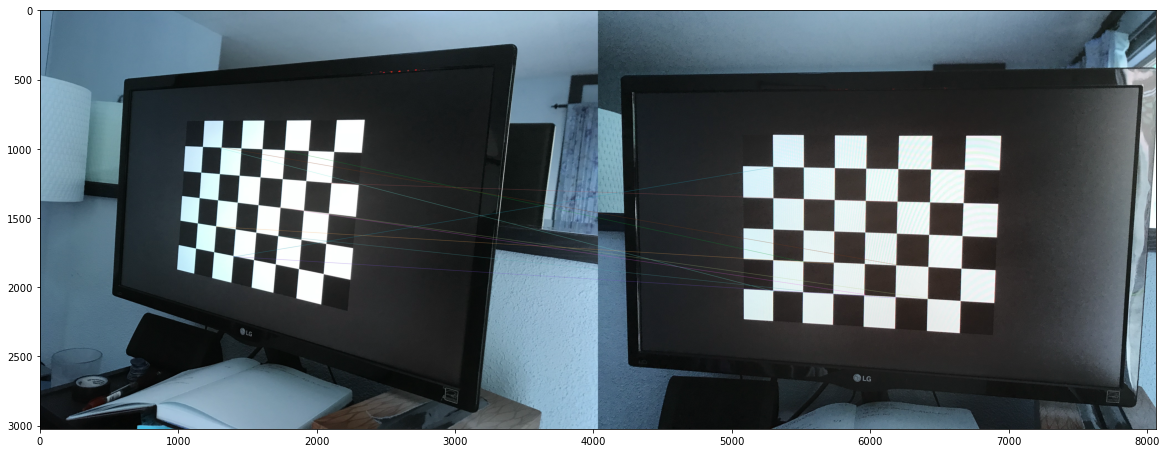

In [74]:
for (f1, f2) in itertools.combinations(files[5:10], 2):
    img1 = load_image(f1)
    img2 = load_image(f2)
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # Draw first 10 matches.
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3)
    plt.show()